In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objs as go\


In [3]:
from wordcloud import WordCloud

In [5]:
import squarify

In [9]:
market = pd.read_csv(r'C:\Users\Atharva Pathak\Desktop\Groceries\Groceries_dataset.csv')

In [10]:
market.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
market.Date = pd.to_datetime(market['Date'])
market['year'] = market['Date'].dt.year
market['month'] = market['Date'].dt.month
market['day'] = market['Date'].dt.day
market['day_of_week'] = market['Date'].dt.dayofweek

In [12]:
market.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [13]:
market['itemDescription'].value_counts()

whole milk                2502
other vegetables          1898
rolls/buns                1716
soda                      1514
yogurt                    1334
root vegetables           1071
tropical fruit            1032
bottled water              933
sausage                    924
citrus fruit               812
pastry                     785
pip fruit                  744
shopping bags              731
canned beer                717
bottled beer               687
whipped/sour cream         662
newspapers                 596
frankfurter                580
brown bread                571
pork                       566
domestic eggs              566
butter                     534
fruit/vegetable juice      518
beef                       516
curd                       514
margarine                  491
coffee                     476
frozen vegetables          425
chicken                    422
white bread                362
                          ... 
syrup                       21
canned f

Text(0.5, 1.0, 'Best Sellers')

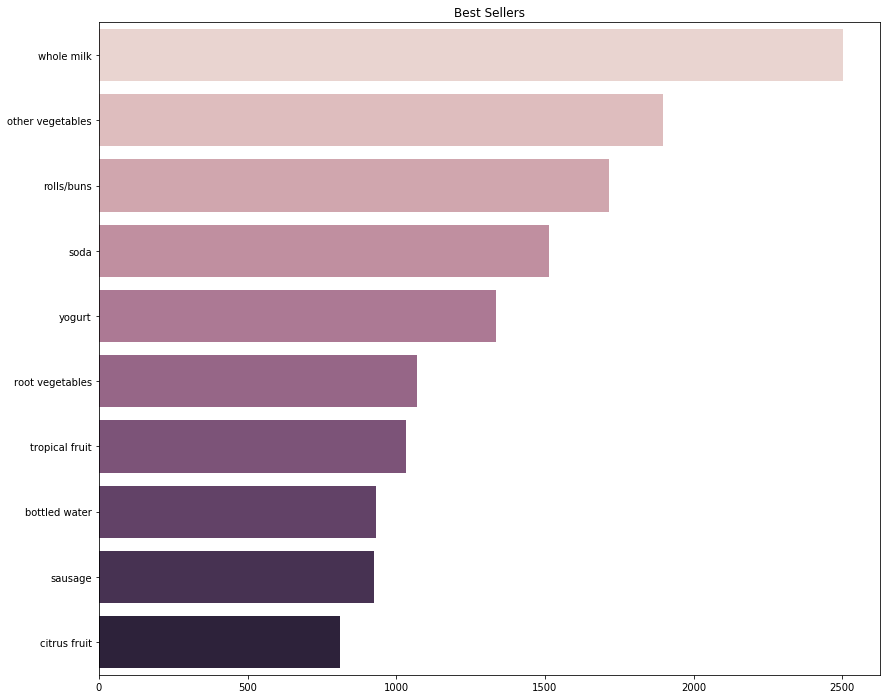

In [14]:
x = list(market['itemDescription'].value_counts()[:10].values)
y = list(market['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(14,12))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

Text(0.5, 1.0, 'Least Sellers')

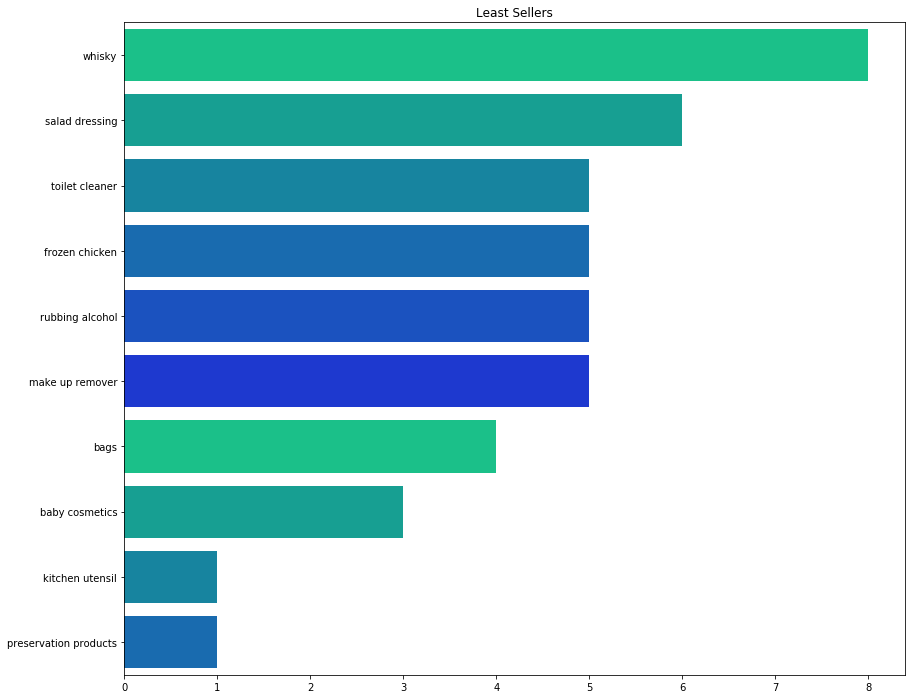

In [15]:
x = list(market['itemDescription'].value_counts()[-10:].values)
y = list(market['itemDescription'].value_counts()[-10:].index)

plt.figure(figsize=(14,12))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

In [16]:
market_year = market.groupby('year')

In [17]:
market_year['itemDescription'].agg(['count'])

,count
year,
2014,18277
2015,20488


2014

In [20]:
market_year2014 = market[market['year']==2014]
market_year2014['itemDescription'].value_counts()

whole milk                1038
other vegetables           859
rolls/buns                 837
soda                       777
yogurt                     640
bottled water              504
root vegetables            479
shopping bags              440
pastry                     405
whipped/sour cream         365
tropical fruit             364
newspapers                 342
brown bread                323
domestic eggs              322
bottled beer               319
fruit/vegetable juice      300
margarine                  294
pip fruit                  287
butter                     273
citrus fruit               268
canned beer                266
coffee                     240
curd                       239
frozen vegetables          225
white bread                213
napkins                    206
cream cheese               194
chocolate                  193
dessert                    188
sausage                    180
                          ... 
liver loaf                  11
bathroom

Text(0.5, 1.0, 'Best Sellers(2014)')

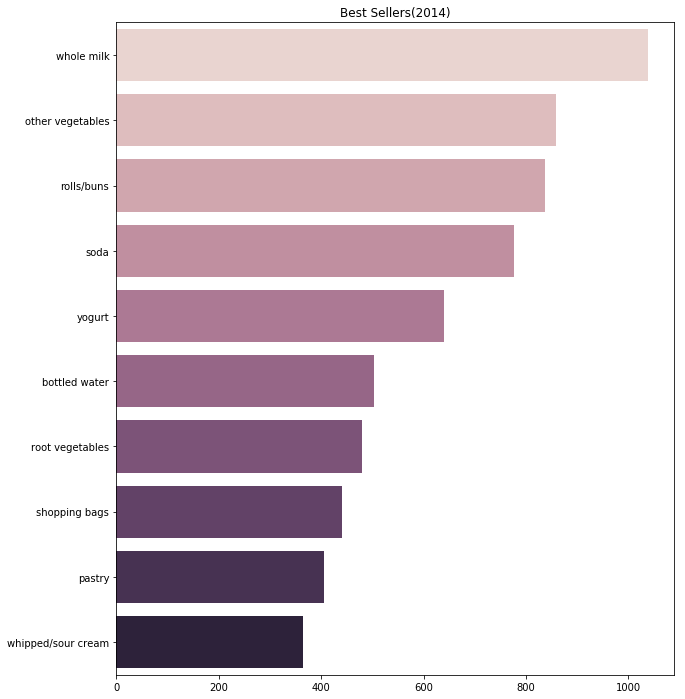

In [21]:
x = list(market_year2014['itemDescription'].value_counts()[:10].index)
y = list(market_year2014['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(10,12))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2014)')

Text(0.5, 1.0, 'Best Sellers(2014)')

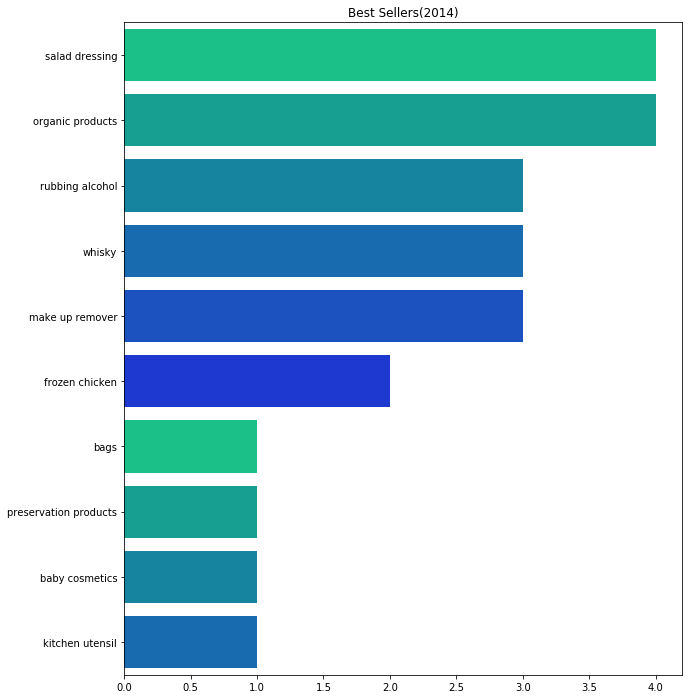

In [22]:
x = list(market_year2014['itemDescription'].value_counts()[-10:].index)
y = list(market_year2014['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(10,12))
ax=sns.barplot(x=y,y=x,palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2014)')

2015

In [25]:
market_year2015 = market[market['year']==2015]
market_year2015['itemDescription'].value_counts()

whole milk                1464
other vegetables          1039
rolls/buns                 879
sausage                    744
soda                       737
yogurt                     694
tropical fruit             668
root vegetables            592
citrus fruit               544
frankfurter                505
pip fruit                  457
canned beer                451
bottled water              429
pork                       427
pastry                     380
bottled beer               368
beef                       339
chicken                    314
whipped/sour cream         297
shopping bags              291
curd                       275
butter                     261
newspapers                 254
brown bread                248
domestic eggs              244
coffee                     236
fruit/vegetable juice      218
frozen vegetables          200
berries                    199
margarine                  197
                          ... 
prosecco                    10
tidbits 

Text(0.5, 1.0, 'Best Sellers(2015)')

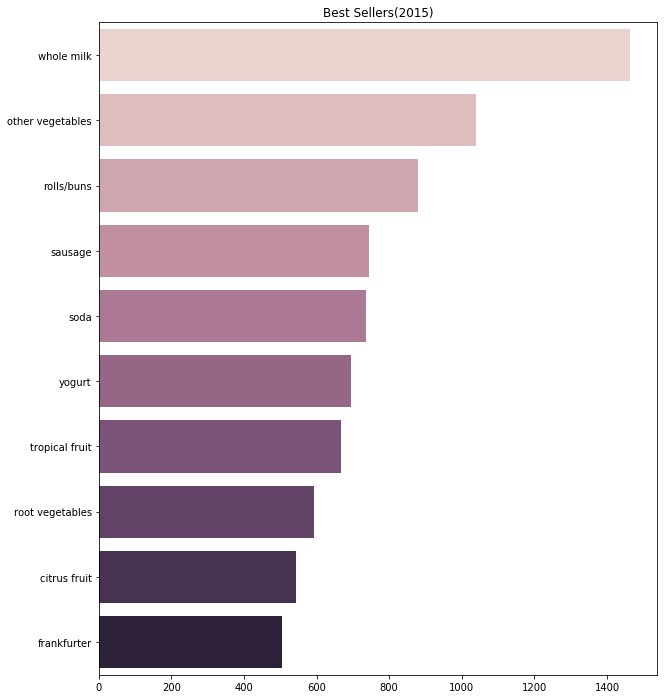

In [26]:
x = list(market_year2015['itemDescription'].value_counts()[:10].index)
y = list(market_year2015['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(10,12))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2015)')

Text(0.5, 1.0, 'Best Sellers(2015)')

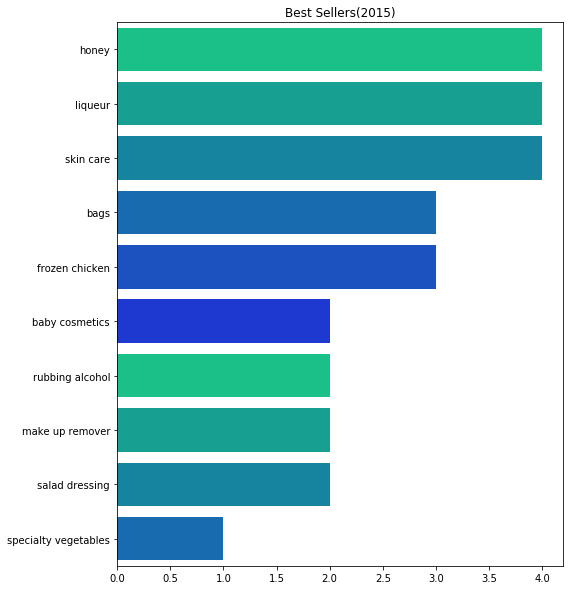

In [27]:
x = list(market_year2015['itemDescription'].value_counts()[-10:].index)
y = list(market_year2015['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2015)')

In [44]:
fig = px.sunburst(market, path=['year', 'month', 'day_of_week'],title="Don't forget to bring the cursor on the chart")
fig.show()

# Item Descriptions

In [45]:
targets = list(dict(market['itemDescription'].value_counts()).keys())
values = list(dict(market['itemDescription'].value_counts()).values())

fig = px.pie(
    values=values, 
    names=targets,
    title='Item Detail Discription',
    color_discrete_sequence=['goldenrod', 'magenta']
)
fig.show()

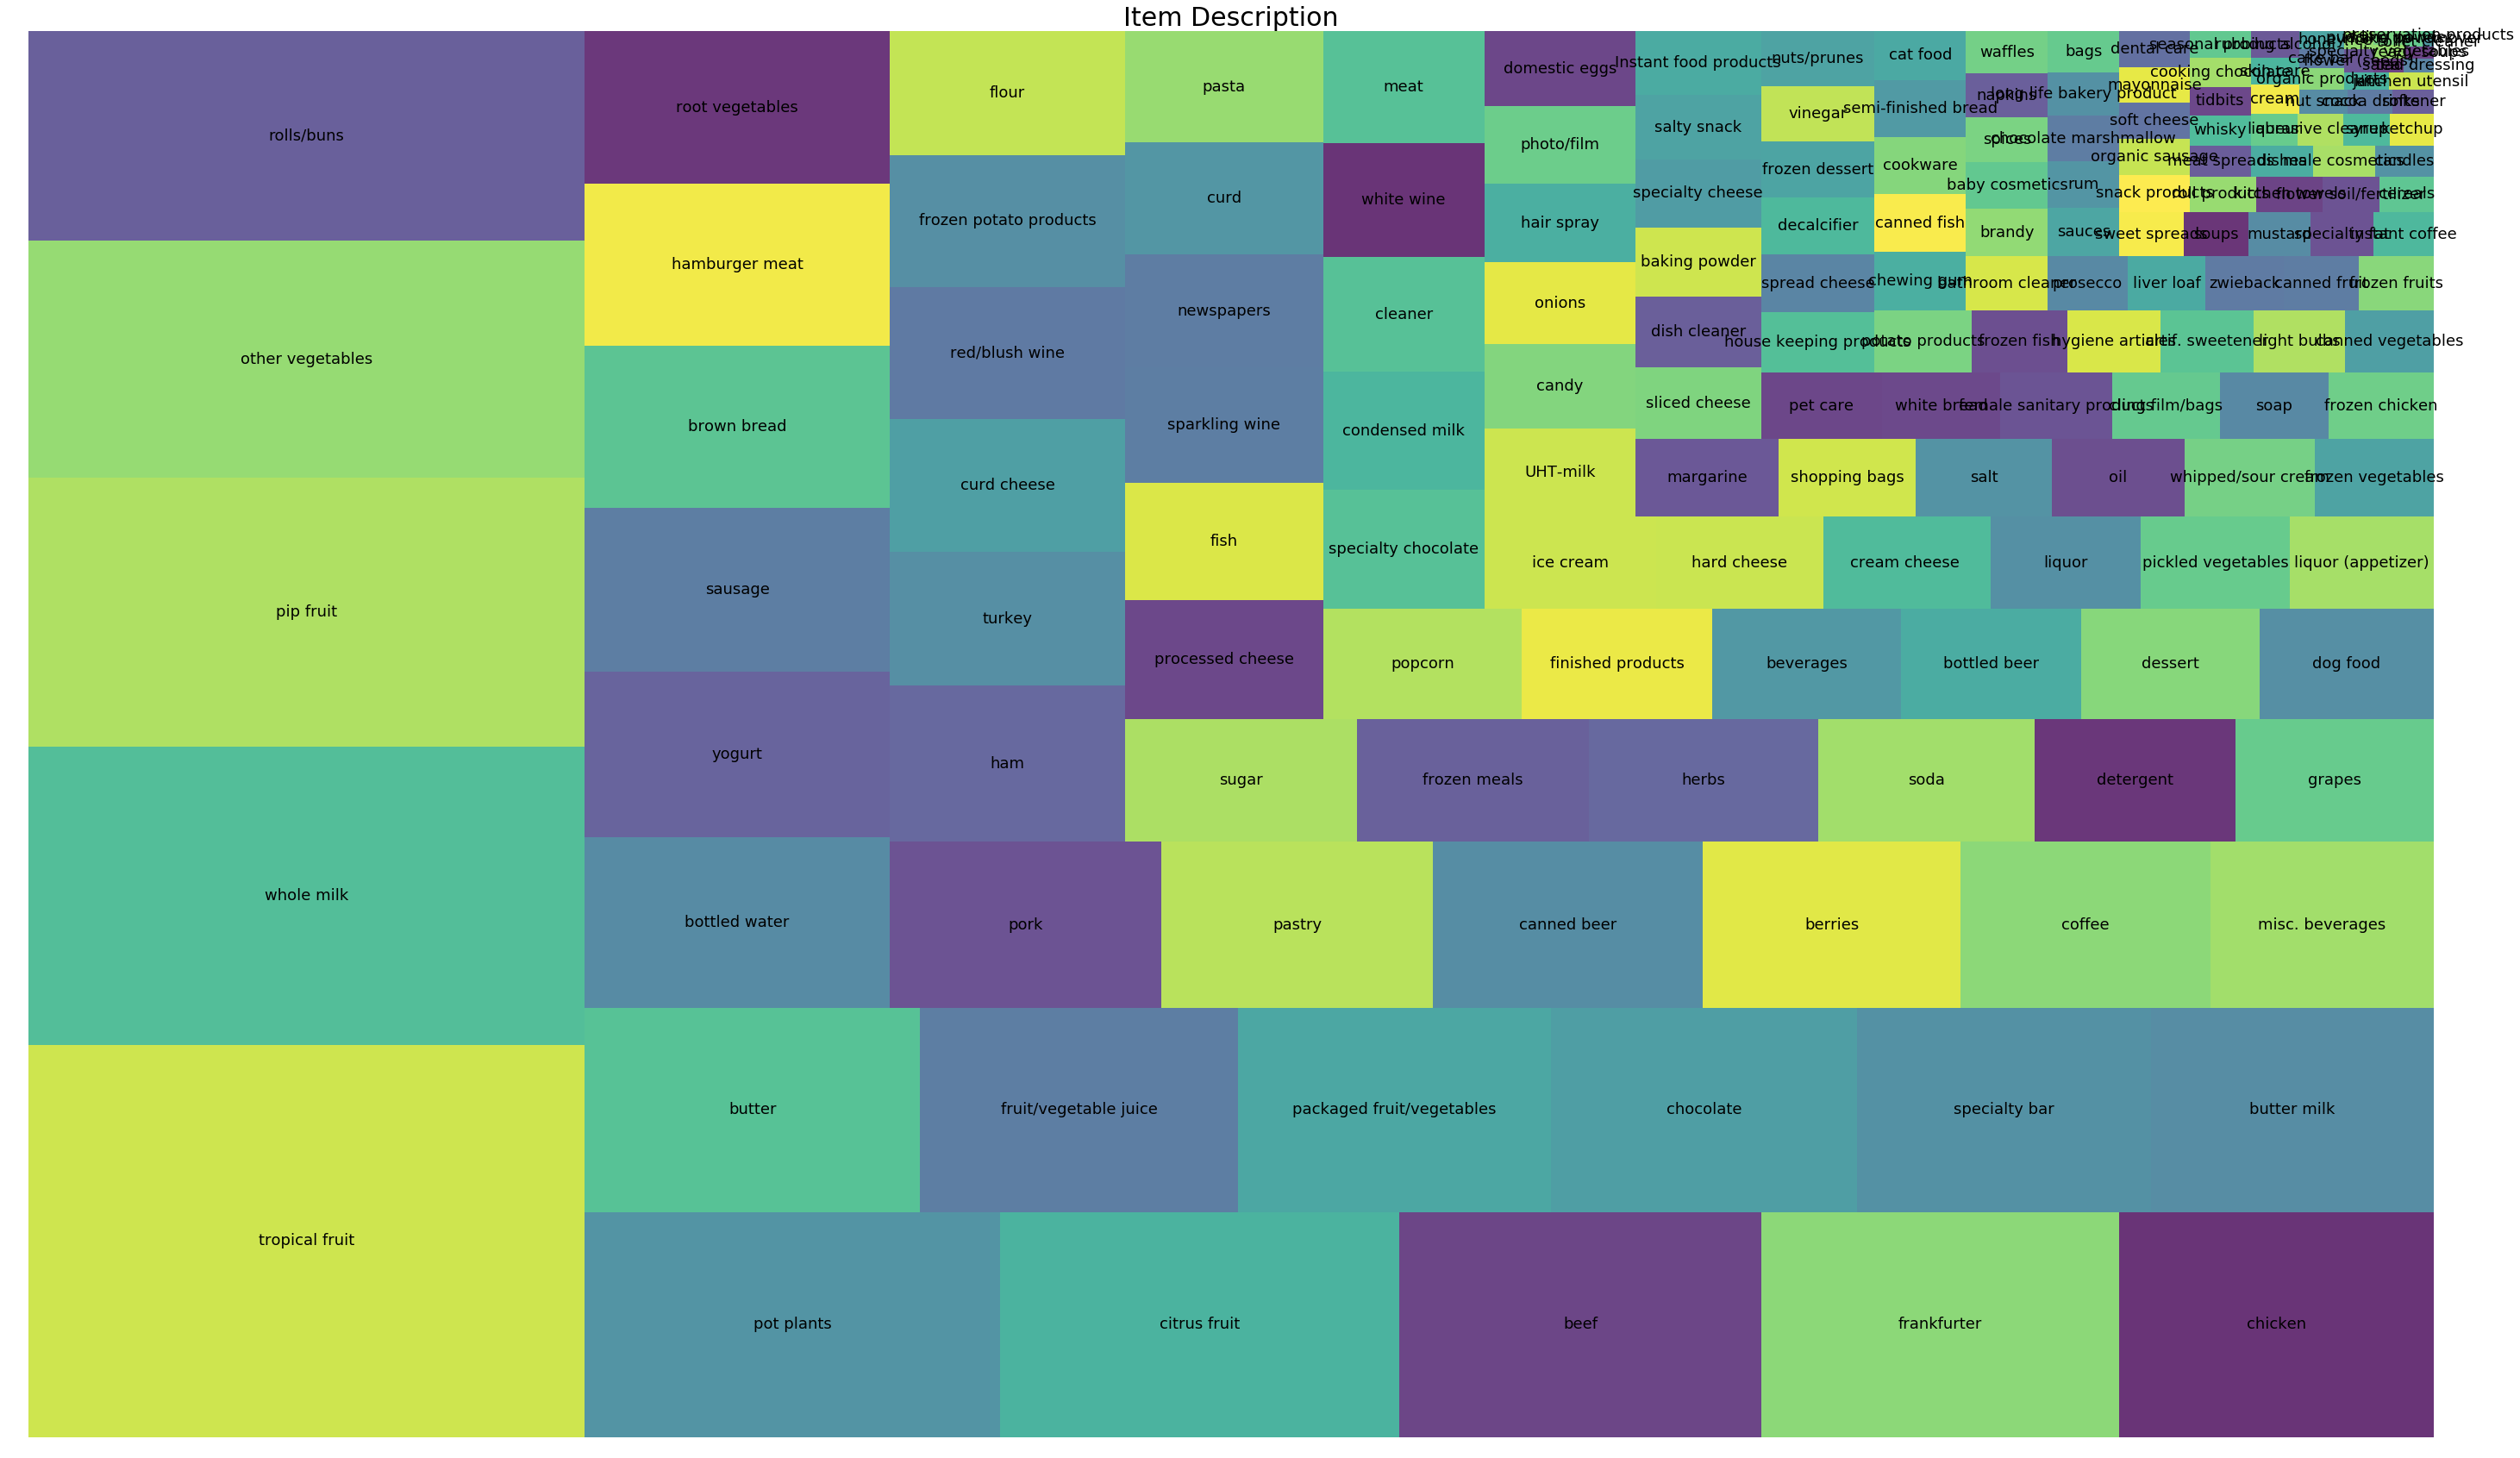

In [30]:
plt.figure(figsize = (50, 30))
squarify.plot(sizes = market.itemDescription.value_counts().values, alpha = 0.8,
              label = market.itemDescription.unique(), text_kwargs={'fontsize':18})
plt.title('Item Description', fontsize = 30)
plt.axis('off')
plt.show()

(-0.5, 511.5, 383.5, -0.5)

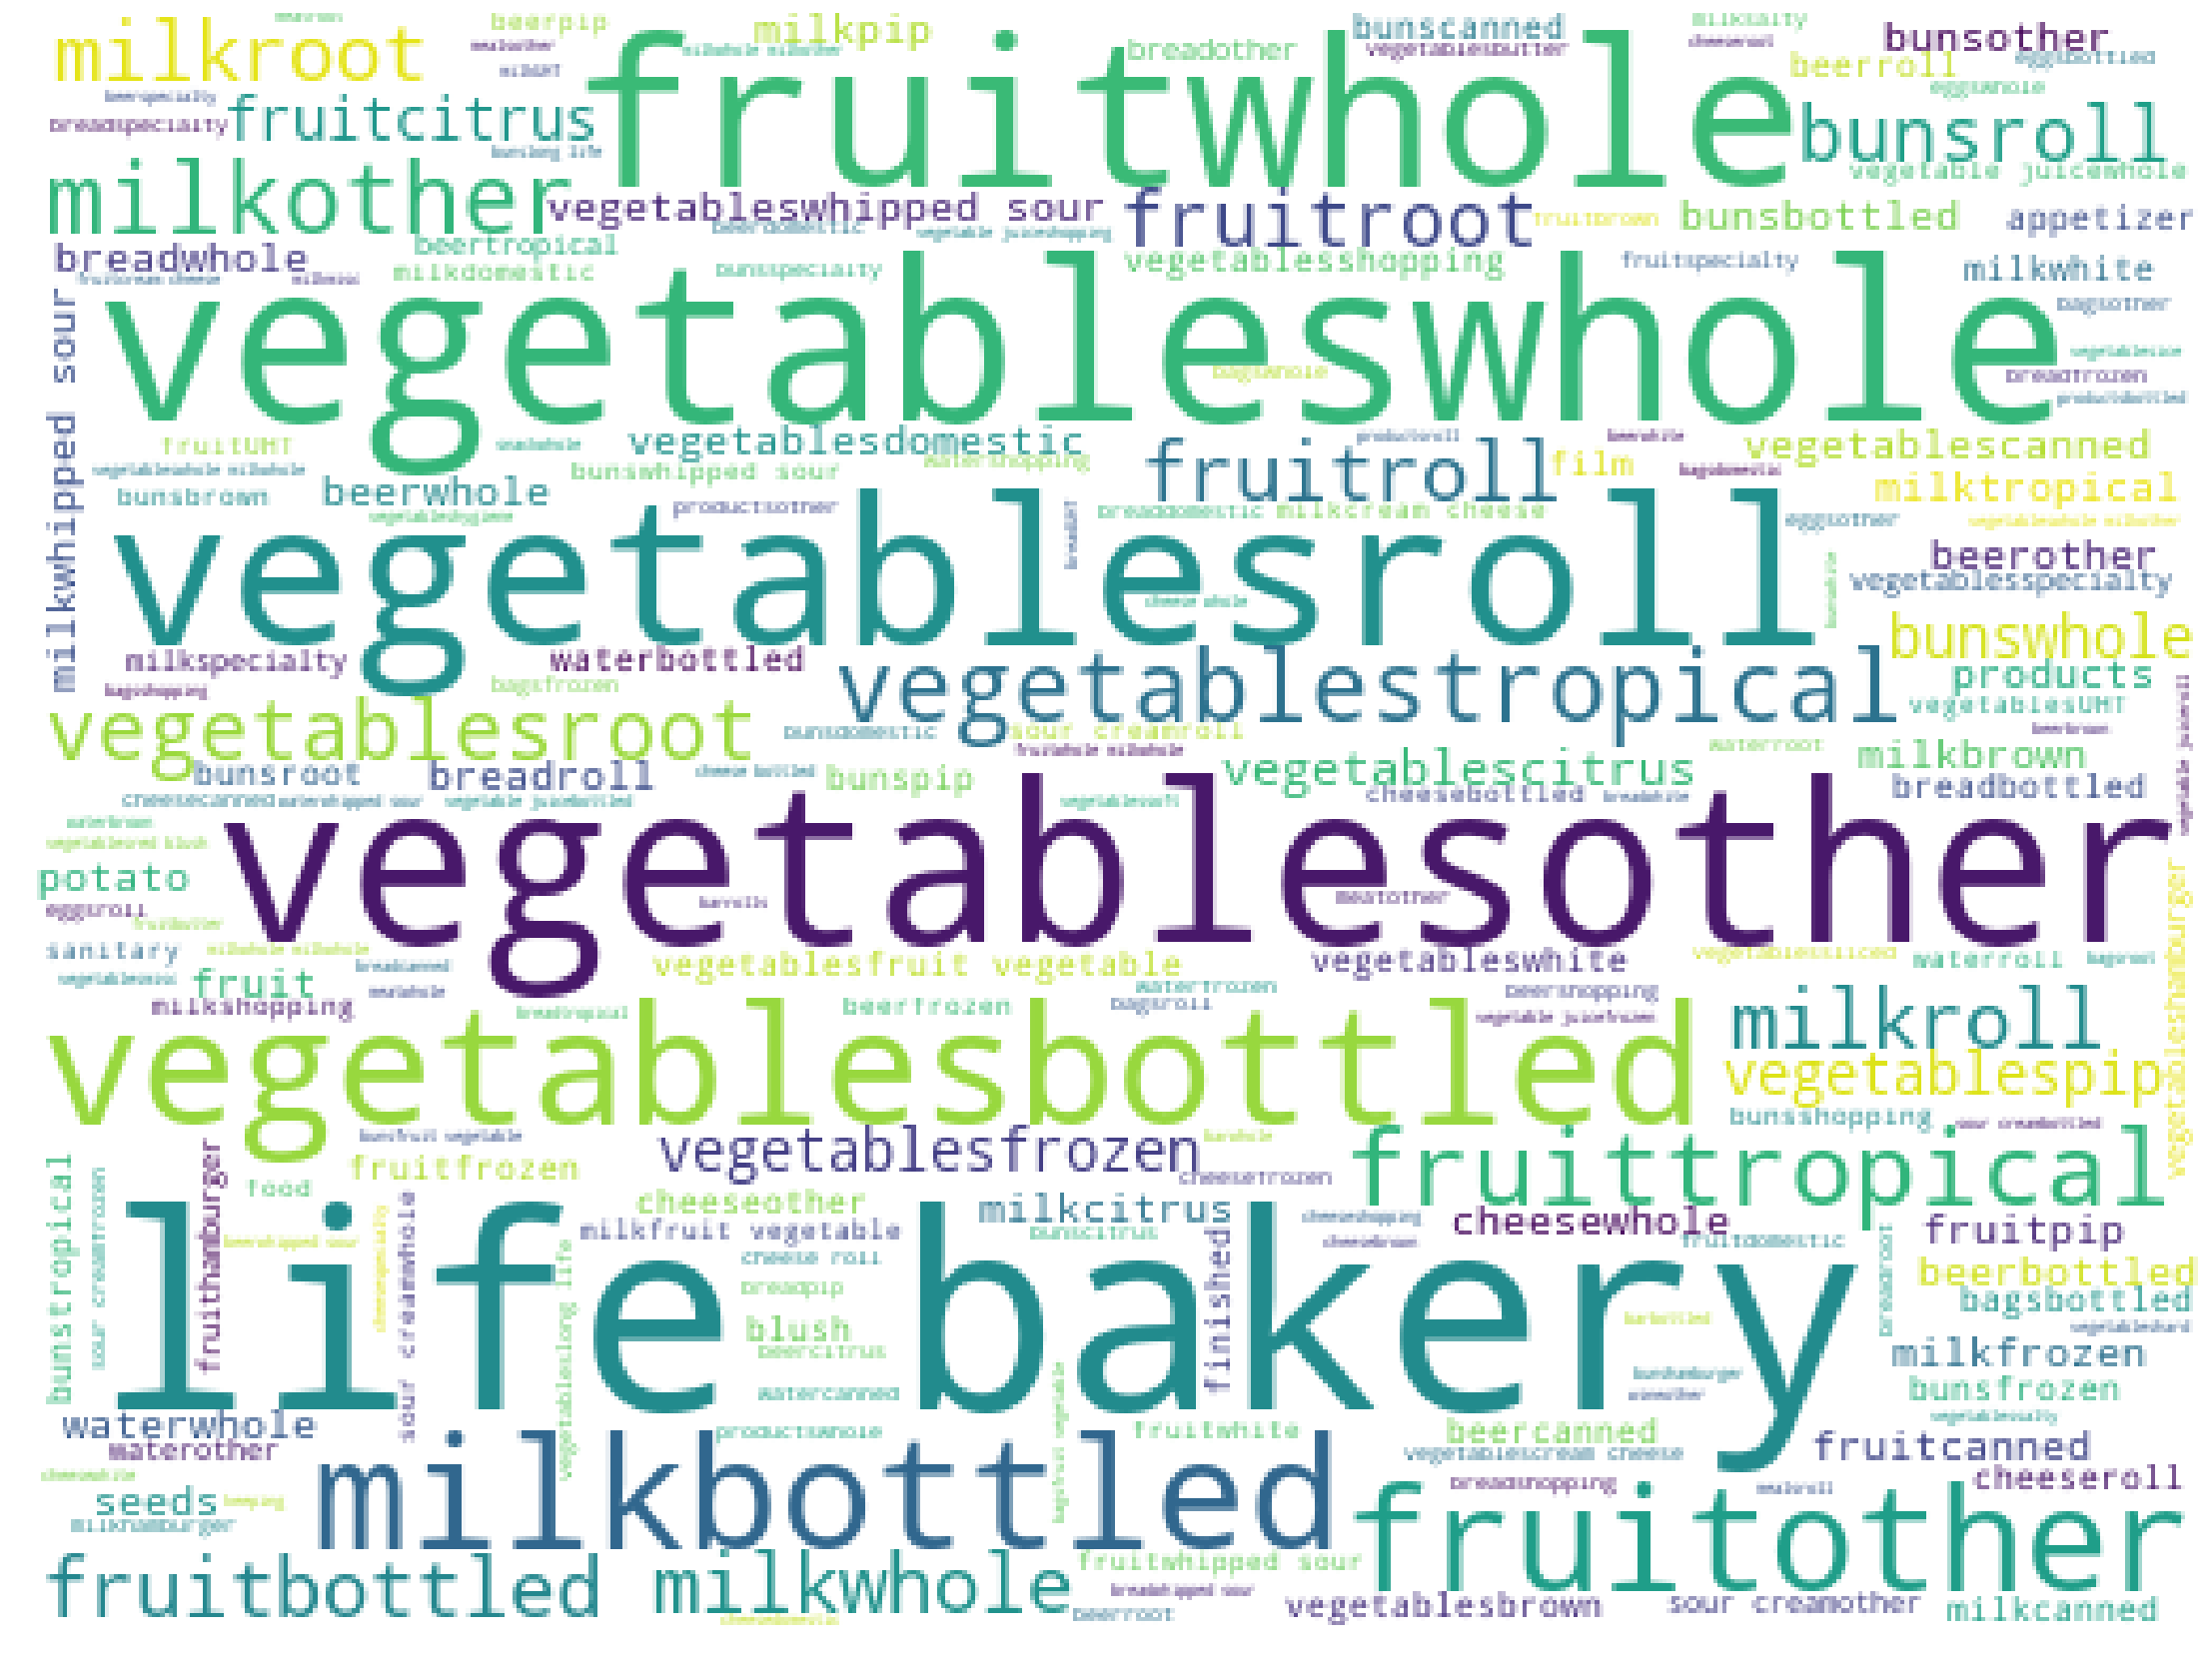

In [31]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

# Apriori

In [32]:
from apyori import apriori

In [33]:
apriori_market = pd.read_csv(r'C:\Users\Atharva Pathak\Desktop\Groceries\Groceries_dataset.csv')
apriori_market.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [34]:
apriori_market = apriori_market.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
apriori_market

,Member_number,Date,itemDescription
0,1000,15-03-2015,"sausage,whole milk,semi-finished bread,yogurt"
1,1000,24-06-2014,"whole milk,pastry,salty snack"
2,1000,24-07-2015,"canned beer,misc. beverages"
3,1000,25-11-2015,"sausage,hygiene articles"
4,1000,27-05-2015,"soda,pickled vegetables"
5,1001,02-05-2015,"frankfurter,curd"
6,1001,07-02-2014,"sausage,whole milk,rolls/buns"
7,1001,12-12-2014,"whole milk,soda"
8,1001,14-04-2015,"beef,white bread"
9,1001,20-01-2015,"frankfurter,soda,whipped/sour cream"


In [35]:
apriori_market.itemDescription.iloc[2]

'canned beer,misc. beverages'

In [36]:
apriori_market.itemDescription.iloc[2].split(",")

['canned beer', 'misc. beverages']

In [37]:
for i in range(len(apriori_market.itemDescription)):
    apriori_market.itemDescription[i] = apriori_market.itemDescription[i].split(",")

C:\Users\Atharva Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
item_list = list(apriori_market.itemDescription)
item_list

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [39]:
rule = apriori(item_list, min_support = 0.0001, min_confidence= 0.0001)

In [40]:
rule

<generator object apriori at 0x000001A1249C5B88>

In [41]:
list_rule = list(rule)
print(len(list_rule))


8343


In [42]:
list_rule[0]

RelationRecord(items=frozenset({'Instant food products'}), support=0.004009891064626078, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Instant food products'}), confidence=0.004009891064626078, lift=1.0)])

In [43]:
results = []
for item in list_rule[:100]:
        pair = item[0]
        items = [x for x in pair]
        
        value_0 = str(items[0])
        value_1 = str(item[1])[:7]
        value_2 = str(item[2][0][2])[:7]
        value_3 = str(item[2][0][3])[:7]
        
        rows = (value_0, value_1, value_2, value_3)
        results.append(rows)
        
        col_names = ['Title_1','Support','Confidence','Lift']
        
        storage = pd.DataFrame.from_records(results,columns=col_names)
        
        print(storage)
        print(' ')

                 Title_1  Support Confidence Lift
0  Instant food products  0.00400    0.00400  1.0
 
                 Title_1  Support Confidence Lift
0  Instant food products  0.00400    0.00400  1.0
1               UHT-milk  0.02138    0.02138  1.0
 
                 Title_1  Support Confidence Lift
0  Instant food products  0.00400    0.00400  1.0
1               UHT-milk  0.02138    0.02138  1.0
2       abrasive cleaner  0.00147    0.00147  1.0
 
                 Title_1  Support Confidence Lift
0  Instant food products  0.00400    0.00400  1.0
1               UHT-milk  0.02138    0.02138  1.0
2       abrasive cleaner  0.00147    0.00147  1.0
3       artif. sweetener  0.00193    0.00193  1.0
 
                 Title_1  Support Confidence Lift
0  Instant food products  0.00400    0.00400  1.0
1               UHT-milk  0.02138    0.02138  1.0
2       abrasive cleaner  0.00147    0.00147  1.0
3       artif. sweetener  0.00193    0.00193  1.0
4         baby cosmetics  0.00020    0.000

                     Title_1  Support Confidence Lift
0      Instant food products  0.00400    0.00400  1.0
1                   UHT-milk  0.02138    0.02138  1.0
2           abrasive cleaner  0.00147    0.00147  1.0
3           artif. sweetener  0.00193    0.00193  1.0
4             baby cosmetics  0.00020    0.00020  1.0
5                       bags  0.00026    0.00026  1.0
6              baking powder  0.00808    0.00808  1.0
7           bathroom cleaner  0.00113    0.00113  1.0
8                       beef  0.03395    0.03395  1.0
9                    berries  0.02178    0.02178  1.0
10                 beverages  0.01657    0.01657  1.0
11              bottled beer  0.04531    0.04531  1.0
12             bottled water  0.06068    0.06068  1.0
13                    brandy  0.00253    0.00253  1.0
14               brown bread  0.03762    0.03762  1.0
15                    butter  0.03522    0.03522  1.0
16               butter milk  0.01757    0.01757  1.0
17                  cake bar